In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
path = '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
!ls

/content/gdrive/.shortcut-targets-by-id/1EoJgFet78Cqka5-cEF0_OIL7aL7xQ5KB/Kaggle 팀 과제/집 가격 예측(회귀)
'220729 초안 0.1.ipynb'			  regression220718.zip
'220730 nearest_sch_ranking_정리.ipynb'   sample_submission.csv
'220730 nearest_sch_ranking.ipynb'	  submission10.csv
 DATE_SOLD2.csv				  submission2.csv
 DATE_SOLD3.csv				  submission3.csv
 DATE_SOLD.csv				  submission4.csv
 garage2.csv				  submission5.csv
 garage.csv				  submission6.csv
 gpu_test2.csv				  submission7.csv
 gpu_test3.csv				  submission8.csv
 gpu_test4.csv				  submission9.csv
 gpu_test.csv				  submission.csv
 only_garage.csv			  test.csv
 rank2.csv				  total2.csv
 rank.csv				  total.csv
 rank+garage2.csv			  train.csv
 rank+garage.csv


In [3]:
!unzip -o -qq regression220718.zip

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


In [7]:
sample_submission = pd.read_csv('sample_submission.csv')

In [8]:
test_id_idx = sample_submission['ID']

In [9]:
test_id_idx

0        18510
1        18511
2        18512
3        18513
4        18514
         ...  
15141    33651
15142    33652
15143    33653
15144    33654
15145    33655
Name: ID, Length: 15146, dtype: int64

In [10]:
len_train_df = len(train_df)
len_test_df = len(test_df)

In [11]:
df = pd.concat([train_df, test_df])

In [12]:
for col in train_df.columns:
    print(col, train_df[col].nunique(), '', sep = '\n')

ID
18510

ADDRESS
18491

SUBURB
318

PRICE
1806

BEDROOMS
10

BATHROOMS
6

GARAGE
22

LAND_AREA
3091

FLOOR_AREA
478

BUILD_YEAR
120

CBD_DIST
579

NEAREST_STN
68

NEAREST_STN_DIST
1080

DATE_SOLD
331

POSTCODE
114

LATITUDE
17203

LONGITUDE
16846

NEAREST_SCH
159

NEAREST_SCH_DIST
18397

NEAREST_SCH_RANK
103



In [13]:
train_df['GARAGE'].fillna(0, inplace = True)

In [14]:
test_df['GARAGE'].fillna(0, inplace = True)

In [15]:
train_df[['SOLD_MONTH', 'SOLD_YEAR']] = train_df['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
train_df.drop(['DATE_SOLD'],axis=1,inplace=True)

In [16]:
test_df[['SOLD_MONTH', 'SOLD_YEAR']] = test_df['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
test_df.drop(['DATE_SOLD'],axis=1,inplace=True)

In [17]:
from IPython.display import display_html

# Display Multiple Dataframe in HTML format
def pd_html(dfs, names=[]):
    html_str = ''
    for i in dfs:
        i.style.background_gradient(cmap='viridis') 
    
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' 
                         for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [18]:
%load_ext Cython

In [19]:
%%cython -a 
import numpy as np
cimport numpy as np

# Regularised Model
cdef class Rtg:

    cdef public np.float64_t lamda, gamma, gain
    cdef public int bfeat_id, min_size, max_depth
    cdef public np.float64_t bfeat_val, value
    cpdef public Rtg lhs
    cpdef public Rtg rhs
    
    def __init__(self, int max_depth=3, np.float64_t lamda=1.0, np.float64_t gamma=0.1, min_size=5):
        self.max_depth = max_depth
        self.gamma = gamma; self.lamda = lamda
        self.lhs = None; self.rhs = None
        self.bfeat_id = -1 
        self.bfeat_val = 0 
        self.value = -7e10
        self.min_size = min_size
        
        return
    
    def fit(self, np.ndarray[np.float64_t, ndim=2] X, np.ndarray[np.float64_t, ndim=1] y):
        
        cpdef long ntot = X.shape[0]
        cpdef long SL = X.shape[0]
        cpdef long SR = 0
        cpdef long idx = 0
        cpdef long thres = 0
        cpdef np.float64_t GL, GR, gain
        cpdef np.ndarray[long, ndim=1] idxs
        cpdef np.float64_t x = 0.0
        cpdef np.float64_t best_gain = -self.gamma
        
        if self.value == -7e10:
            self.value = y.mean()
        if(self.max_depth <= 1):
            return
        
        error0 = ((y - self.value) ** 2).sum()
        error = error0; fid = 0
        n_feat = X.shape[1]
        left_value = 0; right_value = 0
        
        for feat in range(n_feat):
            
            idxs = np.argsort(X[:,feat])
            GL,GR = y.sum(),0.0
            SL,SR, thres = ntot, 0, 0
            
            while thres < ntot - 1:
                
                SL = SL - 1; SR = SR + 1
                idx = idxs[thres]
                x = X[idx, feat]
                
                GL = GL - y[idx]; GR = GR + y[idx]
                gain1 = (GL**2) / (SL + self.lamda)  + (GR**2) / (SR + self.lamda)
                gain2 = - ((GL + GR)**2) / (SL + SR + self.lamda) + self.gamma
                gain = gain1+gain2
                
                if thres < ntot - 1 and x == X[idxs[thres + 1], feat]:
                    thres += 1
                    continue
                
                if (gain > best_gain) and (min(SL,SR) > self.min_size):
                    
                    fid = 1
                    best_gain = gain
                    left_value = -GL / (SL + self.lamda)
                    right_value = -GR / (SR + self.lamda)
                    
                    self.bfeat_id = feat
                    self.bfeat_val = x

                thres += 1
        
        self.gain = best_gain
        if self.bfeat_id == -1:
            return
                
        self.lhs = Rtg(max_depth=self.max_depth - 1, gamma=self.gamma, lamda=self.lamda)
        self.rhs = Rtg(max_depth=self.max_depth - 1, gamma=self.gamma, lamda=self.lamda)
        self.lhs.value = left_value
        self.rhs.value = right_value

        idxs_l = (X[:, self.bfeat_id] > self.bfeat_val)
        idxs_r = (X[:, self.bfeat_id] <= self.bfeat_val)
        self.lhs.fit(X[idxs_l, :], y[idxs_l])
        self.rhs.fit(X[idxs_r, :], y[idxs_r])
        
        if (self.lhs.lhs == None or self.rhs.lhs == None):
            if self.gain < 0.0:
                self.lhs = None; self.rhs = None; self.bfeat_id = -1

    def ppredict(self, np.ndarray[np.float64_t, ndim=1] x):
        if self.bfeat_id == -1:
            return self.value
        if x[self.bfeat_id] > self.bfeat_val:
             return self.lhs.ppredict(x)
        else:
            return self.rhs.ppredict(x)
        
    def predict(self, np.ndarray[np.float64_t, ndim=2] X):
        y = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            y[i] = self.ppredict(X[i])
            
        return y
    
# Bagging Model Regularised Model
class RtgBag():
    
    def __init__(self,min_size=5,max_depth=3,n_samples=10):
            
        self.max_depth = max_depth
        self.min_size = min_size
        self.n_samples = n_samples
        self.subsample_size = None
        self.lst_tree = [Rtg(min_size=self.min_size,max_depth=self.max_depth) for _ in range(self.n_samples)]
    
    def get_samples(self,X,y):

        i = np.random.randint(0, len(X), (self.n_samples, self.subsample_size))
        sampX = X[i]; sampy = y[i]
        return sampX, sampy
    
    def fit(self,X,y):
        
        ntot = X.shape[0]
        self.subsample_size = int(ntot)
        sampX, sampy = self.get_samples(X,y)
        for i in range(self.n_samples):
            self.lst_tree[i].fit(sampX[i], sampy[i].reshape(-1))
        return self
        
    def predict(self,X):
        
        mtot = X.shape[0]; pred = []
        for i in range(self.n_samples):
            pred.append(self.lst_tree[i].predict(X))
        pred = np.array(pred).T

        return np.array([np.mean(pred[i]) for i in range(mtot)])

In [20]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error as mse

# Gradient Boosting Model (XGB/XGB+Bagging)
class GBoost(BaseEstimator,RegressorMixin):
    
    def __init__(self, n_estimators=10, learning_rate=0.5, max_depth=3, 
                 n_samples = 15, min_size = 5, tree_id='xgb_bagging'):
            
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.min_size = min_size
        self.treem_id = []
        self.n_samples = n_samples
        self.tree_id = tree_id
        self.dm_depth = 1 
        self.mse_cond = 1.5 
    
    def fit(self, X, y):
        
        if(type(X) is not np.ndarray):
            X = X.values;
            y = y.values
        self.X = X; self.y = y
        
        ntot = X.shape[0]
        y0 = np.mean(y) * np.ones([ntot])
        prediction = y0.copy()
        prm1 = 1.1; prm2 = 1.5
        
        for t in range(self.n_estimators):
                        
            if t == 0:
                resid = y
            else:
                resid = (y - prediction)
                if (mse(temp_resid,resid) < self.mse_cond):
                    self.learning_rate = self.learning_rate/prm1
                    self.mse_cond = self.mse_cond/prm2
                    self.dm_depth = self.dm_depth+1
            
            d0 = self.min_size; d1 = self.max_depth+self.dm_depth
            if self.tree_id == 'xgb':
                submodel = Rtg(min_size=d0,max_depth=d1)
            if self.tree_id == 'xgb_bagging':
                submodel = RtgBag(min_size=d0,max_depth=d1,n_samples=self.n_samples)
                
            submodel.fit(X,-resid.astype('float64'))
            y0 = submodel.predict(X).reshape([ntot])
            self.treem_id.append(submodel)
            prediction += self.learning_rate * y0
            temp_resid = -resid

        return self
    
    def predict(self,X):
        
        if(type(X) is not np.ndarray):
            X = X.values;
        
        mtot = X.shape[0]
        y_pred_gb = np.mean(self.y)*np.ones([mtot])
        for t in range(self.n_estimators):
            y_pred_gb += self.learning_rate * self.treem_id[t].predict(X).reshape([mtot])
            
        return y_pred_gb

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_model(df,cols=None):

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # list of features w/ missing data 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # get all colun data w/o missing data
    
    if(cols is not None):
        cols_nan = cols
        df1 = ldf[cols_nan].describe()
    
    fill_id = -1
    for col in cols_nan:    
        fill_id+=1
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model0 = GBoost(n_estimators=10,tree_id='xgb_bagging')
        model1 = KNeighborsRegressor(n_neighbors=15)  # KNR Unsupervised Approach
        knr = model0.fit(imp_train[cols_no_nan], imp_train[col])
        xgb = model1.fit(imp_train[cols_no_nan], imp_train[col])
        knrP = knr.predict(imp_test[cols_no_nan])
        xgbP = xgb.predict(imp_test[cols_no_nan])
        pred = (knrP + xgbP)*0.5
        ldf.loc[df[col].isna(), col] = pred
        ldf.loc[df[col].isna(),'fill_id'] = fill_id
        
    df2 = ldf[cols_nan].describe()
    pd_html([df1,df2],['before imputation','after imputation'])
        
    return pd.concat([ldf,ldf_putaside],axis=1)

In [22]:
train_df = impute_model(train_df,cols=['BUILD_YEAR','NEAREST_SCH_RANK'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

before imputation after imputation 
 
 
 
 BUILD_YEAR 
 NEAREST_SCH_RANK 
 
 
 
 
 count 
 16782.000000 
 12510.000000 
 
 
 mean 
 1989.805327 
 72.687050 
 
 
 std 
 21.003456 
 40.538834 
 
 
 min 
 1868.000000 
 1.000000 
 
 
 25% 
 1979.000000 
 39.000000 
 
 
 50% 
 1995.000000 
 68.000000 
 
 
 75% 
 2005.000000 
 105.000000 
 
 
 max 
 2017.000000 
 139.000000 
 
 
 
 
 
 
 BUILD_YEAR 
 NEAREST_SCH_RANK 
 
 
 
 
 count 
 18510.000000 
 18510.000000 
 
 
 mean 
 1989.799210 
 77.093529 
 
 
 std 
 20.194022 
 34.946866 
 
 
 min 
 1868.000000 
 1.000000 
 
 
 25% 
 1980.000000 
 52.000000 
 
 
 50% 
 1994.130704 
 84.097209 
 
 
 75% 
 2004.000000 
 99.215485 
 
 
 max 
 2017.000000 
 139.000000

In [23]:
train_df.drop(['fill_id'], axis = 1, inplace = True)

In [24]:
test_df = impute_model(test_df,cols=['BUILD_YEAR','NEAREST_SCH_RANK'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

before imputation after imputation 
 
 
 
 BUILD_YEAR 
 NEAREST_SCH_RANK 
 
 
 
 
 count 
 13719.000000 
 10194.000000 
 
 
 mean 
 1989.585465 
 72.654797 
 
 
 std 
 20.916498 
 40.765334 
 
 
 min 
 1870.000000 
 1.000000 
 
 
 25% 
 1978.000000 
 39.000000 
 
 
 50% 
 1995.000000 
 68.000000 
 
 
 75% 
 2005.000000 
 105.000000 
 
 
 max 
 2017.000000 
 139.000000 
 
 
 
 
 
 
 BUILD_YEAR 
 NEAREST_SCH_RANK 
 
 
 
 
 count 
 15146.000000 
 15146.000000 
 
 
 mean 
 188.881870 
 75.017676 
 
 
 std 
 5583.526633 
 35.411245 
 
 
 min 
 -17145.675753 
 1.000000 
 
 
 25% 
 1972.000000 
 51.000000 
 
 
 50% 
 1993.000000 
 78.000000 
 
 
 75% 
 2004.000000 
 99.000000 
 
 
 max 
 2017.000000 
 139.000000

In [25]:
test_df.drop(['fill_id'], axis = 1, inplace = True)

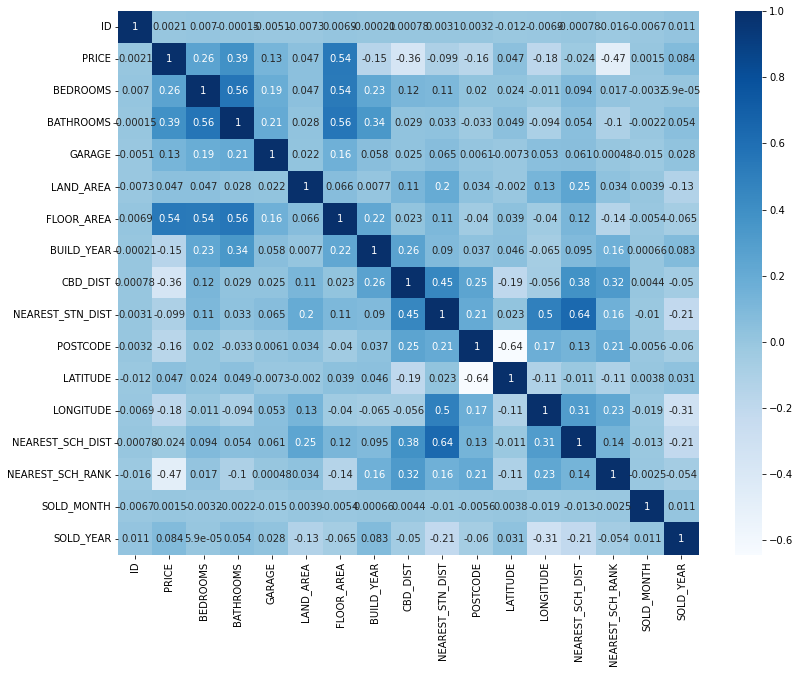

In [26]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df.corr(),annot=True,cmap="Blues")

In [27]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
top_corr_features

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR'],
      dtype='object')

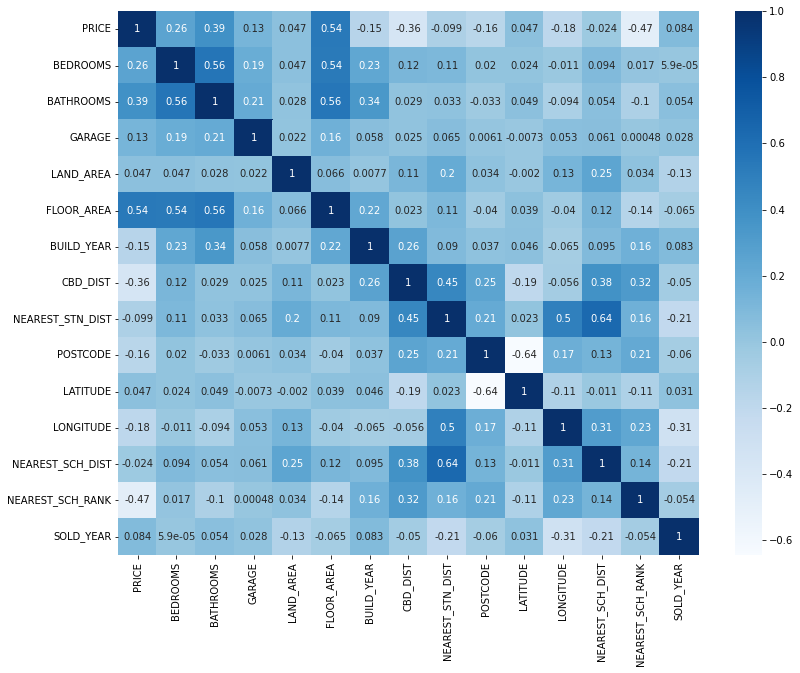

In [28]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Blues")

In [29]:
# feature selection
train_df = train_df[top_corr_features]
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [30]:
train_y_label = train_df['PRICE'] 	# target 값을 미리 분리하였음.
train_df.drop(['PRICE'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
boston_df = pd.concat((train_df, test_df), axis=0)
boston_df_index = boston_df.index

print('Length of Boston Dataset : ',len(boston_df))
boston_df.head()

Length of Boston Dataset :  33656


,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR
0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.000000,2015.0
1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,79.452843,2018.0
2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.000000,2020.0
3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.000000,2020.0
4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.000000,2017.0


In [32]:
# check null 
check_null = boston_df.isna().sum() / len(boston_df)

# columns of null ratio >= 0.5
check_null[check_null >= 0.0]

BEDROOMS            0.0
BATHROOMS           0.0
GARAGE              0.0
LAND_AREA           0.0
FLOOR_AREA          0.0
BUILD_YEAR          0.0
CBD_DIST            0.0
NEAREST_STN_DIST    0.0
POSTCODE            0.0
LATITUDE            0.0
LONGITUDE           0.0
NEAREST_SCH_DIST    0.0
NEAREST_SCH_RANK    0.0
SOLD_YEAR           0.0
dtype: float64

In [33]:
remove_cols = check_null[check_null >= 0.5].keys()
boston_df = boston_df.drop(remove_cols, axis=1)

In [34]:
boston_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR
0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.000000,2015.0
1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,79.452843,2018.0
2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.000000,2020.0
3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.000000,2020.0
4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.000000,2017.0


In [35]:
# split object & numeric
boston_obj_df = boston_df.select_dtypes(include='object')	# 카테고리형
boston_num_df = boston_df.select_dtypes(exclude='object')	# 수치형

In [36]:
print('Object type columns:\n',boston_obj_df.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:\n',boston_num_df.columns)

Object type columns:
 Index([], dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:
 Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR'],
      dtype='object')


In [ ]:
# boston_dummy_df = pd.get_dummies(boston_obj_df, drop_first=True)
# boston_dummy_df.index = boston_df_index
# boston_dummy_df.head()
# boston_dummy_df = pd.DataFrame()

# from sklearn.preprocessing import LabelEncoder
# for col in boston_obj_df.columns:
#     le = LabelEncoder()
#     le.fit(boston_obj_df[col])
#     boston_dummy_df[col] = le.transform(boston_obj_df[col])


In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(boston_num_df)
boston_num_df_ = imputer.transform(boston_num_df)
boston_num_df = pd.DataFrame(boston_num_df_, columns=boston_num_df.columns, index=boston_df_index )
boston_num_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR
0,5.0,2.0,4.0,674.0,266.0,2007.0,35500.0,3000.0,6030.0,-31.656206,115.720566,1.079230,120.000000,2015.0
1,5.0,4.0,2.0,540.0,301.0,2014.0,16900.0,8100.0,6065.0,-31.800802,115.867675,0.667585,72.672569,2018.0
2,4.0,2.0,2.0,781.0,220.0,1992.0,33500.0,3500.0,6030.0,-31.682040,115.702600,0.650761,111.000000,2020.0
3,2.0,1.0,2.0,425.0,185.0,1938.0,3500.0,1500.0,6016.0,-31.926046,115.838181,0.484465,106.000000,2020.0
4,3.0,2.0,2.0,546.0,186.0,2004.0,12900.0,800.0,6159.0,-32.032079,115.759626,1.869050,25.000000,2017.0


In [ ]:
# boston_df = pd.merge(boston_dummy_df, boston_num_df, left_index=True, right_index=True)
# boston_df.head()

In [ ]:
# boston_df['PRICE'] = df['PRICE']

In [ ]:
# corrmat = boston_df.corr()
# top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
# top_corr_features

In [ ]:
# plt.figure(figsize=(13,10))
# g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Pastel1")

In [ ]:
# feature selection
# boston_df = boston_df[top_corr_features]

In [37]:
boston_df = boston_num_df
boston_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR
0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.000000,2015.0
1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,79.452843,2018.0
2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.000000,2020.0
3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.000000,2020.0
4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.000000,2017.0


In [38]:
boston_df

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR
0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.000000,2015.0
1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,79.452843,2018.0
2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.000000,2020.0
3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.000000,2020.0
4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.000000,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,3,1,0.0,801,108,1996.0,10800,3900,6061,-31.857800,115.834370,1.352896,60.826620,2018.0
15142,4,2,2.0,530,158,1998.0,13100,854,6147,-32.039400,115.951670,1.526169,78.306837,2018.0
15143,3,2,2.0,1072,148,1950.0,14700,3800,6020,-31.852980,115.757010,1.779797,47.000000,2015.0
15144,5,3,2.0,19996,396,1990.0,24900,10200,6071,-31.878930,116.107640,3.523922,78.000000,2012.0


In [39]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()


train_df = boston_df[:len_train_df]
test_df = boston_df[len_train_df:]
# std_scaler.fit(train_df)
# train_df = std_scaler.transform(train_df)
# train_df = pd.DataFrame(train_df, columns = boston_df.columns)

# std_scaler.fit(test_df)
# test_df = std_scaler.transform(test_df)
# test_df = pd.DataFrame(test_df, columns = boston_df.columns)

train_df['PRICE'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))


from sklearn.model_selection import train_test_split

X_train = train_df.drop(['PRICE'], axis=1)
y_train = train_df['PRICE']

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state = 42)

X_test = test_df

train set length:  18510
test set length:  15146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [40]:
print('X_train : ',len(X_train))
# print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  18510
X_test : 15146


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'eta':[0.1, 0.2, 0.3],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor(max_depth = 5, seed = 42)
grid_search = GridSearchCV(estimator=model, param_grid=param, cv = 5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

[10:51:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.7, 'eta': 0.1, 'n_estimators': 650}
XGBRegressor(colsample_bylevel=0.5, colsample_bytree=0.7, eta=0.1, max_depth=5,
             n_estimators=650, seed=42)


In [ ]:
# X_train = boston_df

In [41]:
import xgboost as xgb

model = xgb.XGBRegressor(eta = 0.1, n_estimators = 650, colsample_bylevel = 0.7, colsample_bytree = 0.7, max_depth = 5, seed = 42)
model.fit(X_train, y_train)

[12:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, eta=0.1, max_depth=5,
             n_estimators=650, seed=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_train = model.predict(X_train)
# pred_val = model.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(X_train)
# pred_val = grid_search.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

train rmse score:  80513.1740158605


In [43]:
test_y_pred = model.predict(X_test)
# test_y_pred = model.predict(X_test)
id_pred_df = pd.DataFrame()
id_pred_df['Id'] = test_id_idx
id_pred_df['PRICE'] = test_y_pred
id_pred_df.to_csv('DATE_SOLD4.csv', index=False)

In [44]:
id_pred_df

,Id,PRICE
0,18510,5.365802e+05
1,18511,1.557856e+06
2,18512,1.006170e+06
3,18513,4.896843e+05
4,18514,2.504907e+05
...,...,...
15141,33651,3.420765e+05
15142,33652,4.625527e+05
15143,33653,1.138763e+06
15144,33654,9.945141e+05
